In [1]:
import pandas as pd


In [11]:
! pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [11]:
center = pd.read_excel('전국치매센터표준데이터-20221014.xls')

In [83]:
dementia = pd.read_csv('보건복지부_시군구별 치매현황_20220311.csv', encoding='cp949')

In [78]:
dementia.rename(columns = {'Unnamed: 7' : '치매환자 유병률', 'Unnamed: 13' : '알츠하이머 환자 유병률', 'Unnamed: 15' : '혈관성 환자 유병률', 'Unnamed: 17':'기타 환자 유병률', 'Unnamed: 19' : '경도인지장애 환자 유병률'}, inplace=True)


In [85]:
dementia

,시점,행정구역(시도)별,행정구역(기초)별,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2020,전국,전국,전체,60~64세,3804709.5,23350.26,0.61,4062.95,9667.01,6001.02,3619.29,0.00,0.00,23350.26,0.61,0.00,0.00,568975.71,14.95
1,2020,전국,전국,전체,65~69세,2635592.0,36620.52,1.39,6371.97,15160.90,9411.47,5676.18,34204.14,1.30,0.00,0.00,2416.38,0.09,472079.05,17.91
2,2020,전국,전국,전체,70~74세,2000708.5,77236.58,3.86,13439.16,31975.94,19849.80,11971.67,74101.52,3.70,1868.56,0.09,1279.71,0.06,432263.10,21.61
3,2020,전국,전국,전체,75~79세,1602662.5,189626.57,11.83,32995.02,78505.40,48734.03,29392.12,79081.82,4.93,36835.05,2.30,73617.65,4.59,238681.35,14.89
4,2020,전국,전국,전체,80~84세,1110911.5,232892.50,20.96,40523.30,96417.50,59853.37,36098.34,182257.11,16.41,8518.04,0.77,42047.60,3.78,530714.37,47.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,2021,제주특별자치도,서귀포시,여,75~79세,3873.0,532.92,13.76,92.73,220.63,136.96,82.60,247.48,6.39,32.15,0.83,252.91,6.53,807.83,20.86
13736,2021,제주특별자치도,서귀포시,여,80~84세,3345.0,778.05,23.26,135.38,322.11,199.96,120.60,704.12,21.05,11.71,0.35,61.88,1.85,1540.65,46.06
13737,2021,제주특별자치도,서귀포시,여,85세이상,3439.5,1134.00,32.97,197.32,469.48,291.44,175.77,973.03,28.29,78.42,2.28,82.20,2.39,799.73,23.25
13738,2021,제주특별자치도,서귀포시,여,60세이상,27760.0,2645.05,9.53,460.24,1095.05,679.78,409.98,2111.89,7.61,130.23,0.47,402.31,1.45,5688.87,20.49


In [7]:
! pip install folium

  Using cached folium-0.13.0-py2.py3-none-any.whl (96 kB)
     |████████████████████████████████| 133 kB 3.2 MB/s eta 0:00:01
  Using cached branca-0.5.0-py3-none-any.whl (24 kB)
     |████████████████████████████████| 13.4 MB 3.4 MB/s eta 0:00:01


In [8]:
import folium
folium.__version__



'0.13.0'

In [12]:
# 서울시 중심부의 위도, 경도 입니다.
map = [37.541, 126.986]

In [131]:
center.columns

Index(['치매센터명', '치매센터유형', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설립연월', '건축물면적',
       '부대시설정보', '의사인원수', '간호사인원수', '사회복지사인원수', '기타인원현황', '운영기관명', '운영기관대표자명',
       '운영기관전화번호', '운영위탁일자', '주요치매관리프로그램소개', '관리기관전화번호', '관리기관명', '데이터기준일자',
       '제공기관코드', '제공기관명', '시군구', '의료진&사회복지사 수'],
      dtype='object')

In [15]:
center

,치매센터명,치매센터유형,소재지도로명주소,소재지지번주소,위도,경도,설립연월,건축물면적,부대시설정보,의사인원수,...,운영기관명,운영기관대표자명,운영기관전화번호,운영위탁일자,주요치매관리프로그램소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,강화군치매안심센터,치매안심센터,인천광역시 강화군 강화읍 충렬사로 26-1,인천광역시 강화군 남산리 324-1,37.737230,126.484710,2019-10,485.90,사무실(2)+프로그램실(2)+검사실(1)+가족카페(1)+대기실(1),1,...,강화군보건소,이강미,032-930-4057,NaN,치매 무료 상담 및 무료치매검사 등,032-930-4001,인천광역시 강화군청,2020-09-18,3570000,인천광역시 강화군
1,김제시 치매안심센터,치매안심센터,전라북도 김제시 성산길 138,전라북도 김제시 요촌동 423-2,35.800808,126.883339,2017-12,841.80,없음,1,...,김제시 보건소,김형희,063-540-4978,NaN,인지재활프로그램인지강화프로그램쉼터카페제공치매치료비지원치매선별검사 및 진단검사 등,063-540-2743,김제시 보건소치매재활과,2019-04-18,4710000,전라북도 김제시
2,공주시치매안심센터,치매안심센터,충청남도 공주시 봉황로 123 공주시보건소 1층,충청남도 공주시 교동 120 공주시보건소 1층,36.457293,127.120835,2018-03,210.00,"상담실, 검진실, 쉼터, 가족카페",2,...,공주시보건소,공주시보건소장(김대식),041-840-8811,2018-03-21,1. 치매조기검진2. 치매노인 지문등록3. 치매치료관리비 지원4. 조호물품(위생물품...,041-840-8527,공주시보건소,2019-09-25,4500000,충청남도 공주시
3,세종특별자치시 치매안심센터(조치원),치매안심센터,세종특별자치시 조치원읍 수원지1길 16,NaN,36.607255,127.300020,2019-01,439.00,"사무실,프로그램실, 상담실",0,...,세종특별자치시보건소,권근용,044-301-2000,NaN,"치매검진, 상담, 쉼터, 가족교실 프로그램 등 운영(기초)",044-301-2000,세종특별자치시보건소,2019-08-13,5690000,세종특별자치시
4,세종특별자치시 치매안심센터(어진동),치매안심센터,세종특별자치시 다솜1로 31,NaN,36.501904,127.256616,2019-06,439.00,"사무실,프로그램실,상담실, 검진실",0,...,세종특별자치시보건소,권근용,044-301-2000,NaN,"치매검진, 상담, 쉼터, 가족교실 프로그램 등 운영(기초)",044-301-2000,세종특별자치시보건소,2019-08-13,5690000,세종특별자치시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,신안군치매안심센터,치매안심센터,"전라남도 신안군 압해읍 천사로 1004, 보건소 1층",전라남도 신안군 압해읍 신장리 463-17,34.833602,126.351425,2021-07,191.30,NaN,1,...,신안군,강정희,061-243-8550,2019-07-16,"치매조기검진, 사례관리 등",061-243-8550,전라남도 신안군,2021-10-15,6460000,전라남도
311,고령군치매안심센터,치매안심센터,경상북도 고령군 대가야읍 왕릉로 56-5,경상북도 고령군 지산리 232-8,35.725234,128.264814,2021-08,265.10,"로비, 사무실, 교육상담실, 검진실, 쉼터 및 가족카페, 프로그램실",1,...,고령군보건소,김곤수,054-950-7961,NaN,"치매예방프로그램, 고위험군인지강화프로그램, 치매조기검진 및 진단·감별검사, 치매환자...",054-954-1300,고령군보건소,2021-10-21,5200000,경상북도 고령군
312,용인시처인구치매안심센터,치매안심센터,경기도 용인시 처인구 중부대로 1199,경기도 용인시 처인구 삼가동 556,37.240867,127.177968,2021-08,281.00,사무실(1)+가족카페(1)+치료실(1)+검진실(1)+쉼터(1)+채움(1)+공감(1),1,...,경기도 용인시 처인구보건소,조순구,031-324-2700,NaN,"무료치매검사, 치매예방프로그램 운영, 치매환자 및 가족프로그램 운영, 치매인식개선 ...",031-324-4473,처인구보건소,2021-10-27,4050000,경기도 용인시
313,용인시기흥구치매안심센터,치매안심센터,경기도 용인시 기흥구 신갈로58번길 11,경기도 용인시 기흥구 신갈동 60-3,37.272606,127.106768,2021-09,321.50,사무실(1)+프로그램실(4)+상담실(1)+검진실(1),1,...,경기도 용인시 기흥구보건소,양정원,031-324-6981,NaN,"치매예방교실, 치매가족카페, 치매진단검사, 치매가족교실",031-324-6981,기흥구보건소,2021-10-27,4050000,경기도 용인시


In [14]:
center.columns

Index(['치매센터명', '치매센터유형', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설립연월', '건축물면적',
       '부대시설정보', '의사인원수', '간호사인원수', '사회복지사인원수', '기타인원현황', '운영기관명', '운영기관대표자명',
       '운영기관전화번호', '운영위탁일자', '주요치매관리프로그램소개', '관리기관전화번호', '관리기관명', '데이터기준일자',
       '제공기관코드', '제공기관명'],
      dtype='object')

In [23]:
# from shapely.geometry import Point, Polygon, LineString
# import geopandas as gpd

def geo_transform(DataFrame) :
    # csv to geopandas
    # lon, lat data를 geometry로 변경
    DataFrame['위도'] = DataFrame['위도'].astype(float)
    DataFrame['경도'] = DataFrame['경도'].astype(float)
    DataFrame['위치'] = DataFrame.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
    DataFrame = gpd.GeoDataFrame(DataFrame, geometry='위치')
    DataFrame.crs = {'init':'epsg:4326'}
    DataFrame = DataFrame.to_crs({'init':'epsg:4326'}) # 좌표계 epsg : 4326
    return DataFrame

In [34]:
# map 생성
# 서울시 중심부의 위도, 경도 입니다.
map = [36.5, 128]
m = folium.Map(location=[map[0], map[1]],  zoom_start=6, tiles='CartoDB positron')

for _, row in center.iterrows() :
    folium.Circle(location=(row['위도'], row['경도']), popup=row['치매센터명'], radius=50, color='#FF580B',
            fill='#FF580B').add_to(m)
    
m # 지도 표현

In [38]:
center['제공기관명'].value_counts()

전라남도        23
대전광역시        6
경기도 화성시      6
충청북도 청주시     5
울산광역시        5
            ..
충청북도 충주시     1
경상북도 상주시     1
대구광역시 북구     1
대전광역시 서구     1
광주광역시 남구     1
Name: 제공기관명, Length: 235, dtype: int64

In [54]:
center['시군구'] = center.소재지지번주소.str.split(' ').str[0]

In [55]:
center['시군구'].unique()

array(['인천광역시', '전라북도', '충청남도', nan, '충청북도', '전라남도', '서울특별시', '경기도',
       '경상북도', '경상남도', '강원도', '부산광역시', '울산광역시', '대전광역시', '서울시', '광주광역시',
       '제주특별자치도', '대구광역시', '대전광역시서구둔산동1300+건강체련관3층'], dtype=object)

In [60]:
center.loc[center.시군구 == '대전광역시서구둔산동1300+건강체련관3층', '시군구']= '대전광역시'

In [64]:
center.loc[center.시군구 == '서울시', '시군구']= '서울특별시'

In [65]:
center['시군구'].value_counts()

경기도        51
전라남도       43
경상북도       25
서울특별시      24
경상남도       21
부산광역시      20
강원도        17
충청남도       16
충청북도       14
전라북도       13
인천광역시      10
대전광역시      10
울산광역시       9
대구광역시       7
제주특별자치도     6
광주광역시       5
Name: 시군구, dtype: int64

In [43]:
center.columns

Index(['치매센터명', '치매센터유형', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설립연월', '건축물면적',
       '부대시설정보', '의사인원수', '간호사인원수', '사회복지사인원수', '기타인원현황', '운영기관명', '운영기관대표자명',
       '운영기관전화번호', '운영위탁일자', '주요치매관리프로그램소개', '관리기관전화번호', '관리기관명', '데이터기준일자',
       '제공기관코드', '제공기관명'],
      dtype='object')

In [80]:
dementia

,시점,행정구역(시도)별,행정구역(기초)별,성별,연령별,노인인구수,치매환자,치매환자 유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자,알츠하이머 환자 유병률,혈관성 환자,혈관성 환자 유병률,기타 환자,기타 환자 유병률,경도인지장애 환자,경도인지장애 환자 유병률
0,NaN,NaN,NaN,NaN,NaN,NaN,환자수,유병률,NaN,NaN,NaN,NaN,환자수,유병률,환자수,유병률,환자수,유병률,환자수,유병률
1,2015.0,전국,전국,전체,60~64세,"2,715,139","16,581",0.61%,"2,885","6,864","4,261","2,570",0,0%,"16,581",0.61%,0,0%,"404,074",14.88%
2,2015.0,전국,전국,전체,65~69세,"2,109,479","29,279",1.39%,"5,095","12,121","7,525","4,538","27,318",1.29%,0,0%,"1,961",0.09%,"378,990",17.96%
3,2015.0,전국,전국,전체,70~74세,"1,777,348","68,047",3.83%,"11,840","28,172","17,488","10,547","65,292",3.67%,"1,614",0.09%,"1,141",0.06%,"381,493",21.46%
4,2015.0,전국,전국,전체,75~79세,"1,353,622","161,555",11.94%,"28,111","66,884","41,520","25,041","67,866",5.01%,"30,102",2.22%,"63,587",4.69%,"205,837",15.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53686,2021.0,제주특별자치도,서귀포시,여,75~79세,"3,873",532.92,13.76%,92.73,220.63,136.96,82.6,247.48,6.39%,32.15,0.83%,252.91,6.53%,807.83,20.86%
53687,2021.0,제주특별자치도,서귀포시,여,80~84세,"3,345",778.05,23.26%,135.38,322.11,199.96,120.6,704.12,21.05%,11.71,0.35%,61.88,1.85%,"1,540.65",46.06%
53688,2021.0,제주특별자치도,서귀포시,여,85세이상,"3,439.5","1,134",32.97%,197.32,469.48,291.44,175.77,973.03,28.29%,78.42,2.28%,82.2,2.39%,799.73,23.25%
53689,2021.0,제주특별자치도,서귀포시,여,60세이상,"27,760","2,645.05",9.53%,460.24,"1,095.05",679.78,409.98,"2,111.89",7.61%,130.23,0.47%,402.31,1.45%,"5,688.87",20.49%


In [88]:
dementia.columns

Index(['시점', '행정구역(시도)별', '행정구역(기초)별', '성별', '연령별', '노인인구수', '치매환자수',
       '치매환자유병률', '최경도 환자', '경도 환자', '중등도 환자', '중증 환자', '알츠하이머 환자수',
       '알츠하이머 환자유병률', '혈관성치매 환자수', '혈관성치매 환자유병률', '기타 환자환자수', '기타 환자유병률',
       '경도인지장애 환자수', '경도인지장애 환자유병률'],
      dtype='object')

In [91]:
dementia['시점'].value_counts()

2020    6672
2021    6672
2022     396
Name: 시점, dtype: int64

In [92]:
dementia['행정구역(시도)별'].value_counts()

경기도        2374
경상북도       1270
서울특별시      1270
경상남도       1174
전라남도       1126
강원도         934
충청남도        886
부산광역시       838
전라북도        838
충청북도        790
인천광역시       550
대구광역시       454
광주광역시       310
대전광역시       310
울산광역시       310
제주특별자치도     166
세종특별자치시      70
전국           70
Name: 행정구역(시도)별, dtype: int64

In [93]:
center['시군구'].value_counts()

경기도        51
전라남도       43
경상북도       25
서울특별시      24
경상남도       21
부산광역시      20
강원도        17
충청남도       16
충청북도       14
전라북도       13
인천광역시      10
대전광역시      10
울산광역시       9
대구광역시       7
제주특별자치도     6
광주광역시       5
Name: 시군구, dtype: int64

In [94]:
df = pd.DataFrame()

In [95]:
df['센터 수'] = center['시군구'].value_counts()

In [108]:
치매환자_수= dementia[dementia['시점'] == 2021].groupby('행정구역(시도)별').sum()['치매환자수'].drop('전국')

In [109]:
df['치매환자 수'] = 치매환자_수

In [133]:
dementia.columns

Index(['시점', '행정구역(시도)별', '행정구역(기초)별', '성별', '연령별', '노인인구수', '치매환자수',
       '치매환자유병률', '최경도 환자', '경도 환자', '중등도 환자', '중증 환자', '알츠하이머 환자수',
       '알츠하이머 환자유병률', '혈관성치매 환자수', '혈관성치매 환자유병률', '기타 환자환자수', '기타 환자유병률',
       '경도인지장애 환자수', '경도인지장애 환자유병률'],
      dtype='object')

In [136]:
df

,센터 수,치매환자 수,치매환자/센터,의료진&사회복지사 수,치매환자/의료진,최경도환자 수
서울특별시,24,1804559.66,75189.985833,315,5728.760825,313993.35
경기도,51,2685312.12,52653.178824,505,5317.449743,467244.42
충청북도,14,468731.50,33480.821429,101,4640.905941,81559.36
대구광역시,7,487339.35,69619.907143,108,4512.401389,84796.99
전라북도,13,614586.70,47275.900000,142,4328.075352,106938.10
제주특별자치도,6,147172.06,24528.676667,37,3977.623243,25607.94
광주광역시,5,257025.49,51405.098000,68,3779.786618,44722.45
경상남도,21,845689.11,40270.910000,233,3629.566996,147149.80
충청남도,16,637646.10,39852.881250,186,3428.204839,110950.45
인천광역시,10,506871.26,50687.126000,155,3270.137161,88195.54


In [112]:
df['치매환자/센터'] = df['치매환자 수'] / df['센터 수']

In [114]:
df.sort_values('치매환자/센터')

,센터 수,치매환자 수,치매환자/센터
전라남도,43,642153.77,14933.808605
울산광역시,9,154817.26,17201.917778
제주특별자치도,6,147172.06,24528.676667
강원도,17,438194.32,25776.136471
대전광역시,10,261007.15,26100.715000
충청북도,14,468731.50,33480.821429
경상북도,25,849467.47,33978.698800
부산광역시,20,750687.11,37534.355500
충청남도,16,637646.10,39852.881250
경상남도,21,845689.11,40270.910000


In [117]:
center.columns

Index(['치매센터명', '치매센터유형', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설립연월', '건축물면적',
       '부대시설정보', '의사인원수', '간호사인원수', '사회복지사인원수', '기타인원현황', '운영기관명', '운영기관대표자명',
       '운영기관전화번호', '운영위탁일자', '주요치매관리프로그램소개', '관리기관전화번호', '관리기관명', '데이터기준일자',
       '제공기관코드', '제공기관명', '시군구'],
      dtype='object')

In [118]:
center['의료진&사회복지사 수'] = center['의사인원수'] + center['간호사인원수']  + center['사회복지사인원수'] 

In [119]:
center.groupby('시군구').sum()['의료진&사회복지사 수']

시군구
강원도        166
경기도        505
경상남도       233
경상북도       318
광주광역시       68
대구광역시      108
대전광역시      109
부산광역시      262
서울특별시      315
울산광역시      105
인천광역시      155
전라남도       441
전라북도       142
제주특별자치도     37
충청남도       186
충청북도       101
Name: 의료진&사회복지사 수, dtype: int64

In [120]:
df['의료진&사회복지사 수'] = center.groupby('시군구').sum()['의료진&사회복지사 수']

In [122]:
df['치매환자/의료진'] =df['치매환자 수'] / df['의료진&사회복지사 수']

In [ ]:
최경도환자_수= dementia[dementia['시점'] == 2021].groupby('행정구역(시도)별').sum()['최경도 환자'].drop('전국')
df['최경도환자 수'] = 최경도환자_수


In [138]:
df['최경도 환자/센터'] =df['최경도환자 수'] / df['센터 수']

In [139]:
df

,센터 수,치매환자 수,치매환자/센터,의료진&사회복지사 수,치매환자/의료진,최경도환자 수,최경도 환자/센터
서울특별시,24,1804559.66,75189.985833,315,5728.760825,313993.35,13083.056250
경기도,51,2685312.12,52653.178824,505,5317.449743,467244.42,9161.655294
충청북도,14,468731.50,33480.821429,101,4640.905941,81559.36,5825.668571
대구광역시,7,487339.35,69619.907143,108,4512.401389,84796.99,12113.855714
전라북도,13,614586.70,47275.900000,142,4328.075352,106938.10,8226.007692
제주특별자치도,6,147172.06,24528.676667,37,3977.623243,25607.94,4267.990000
광주광역시,5,257025.49,51405.098000,68,3779.786618,44722.45,8944.490000
경상남도,21,845689.11,40270.910000,233,3629.566996,147149.80,7007.133333
충청남도,16,637646.10,39852.881250,186,3428.204839,110950.45,6934.403125
인천광역시,10,506871.26,50687.126000,155,3270.137161,88195.54,8819.554000


In [147]:
df['최경도 환자/의료진'] =df['최경도환자 수'] / df['의료진&사회복지사 수']

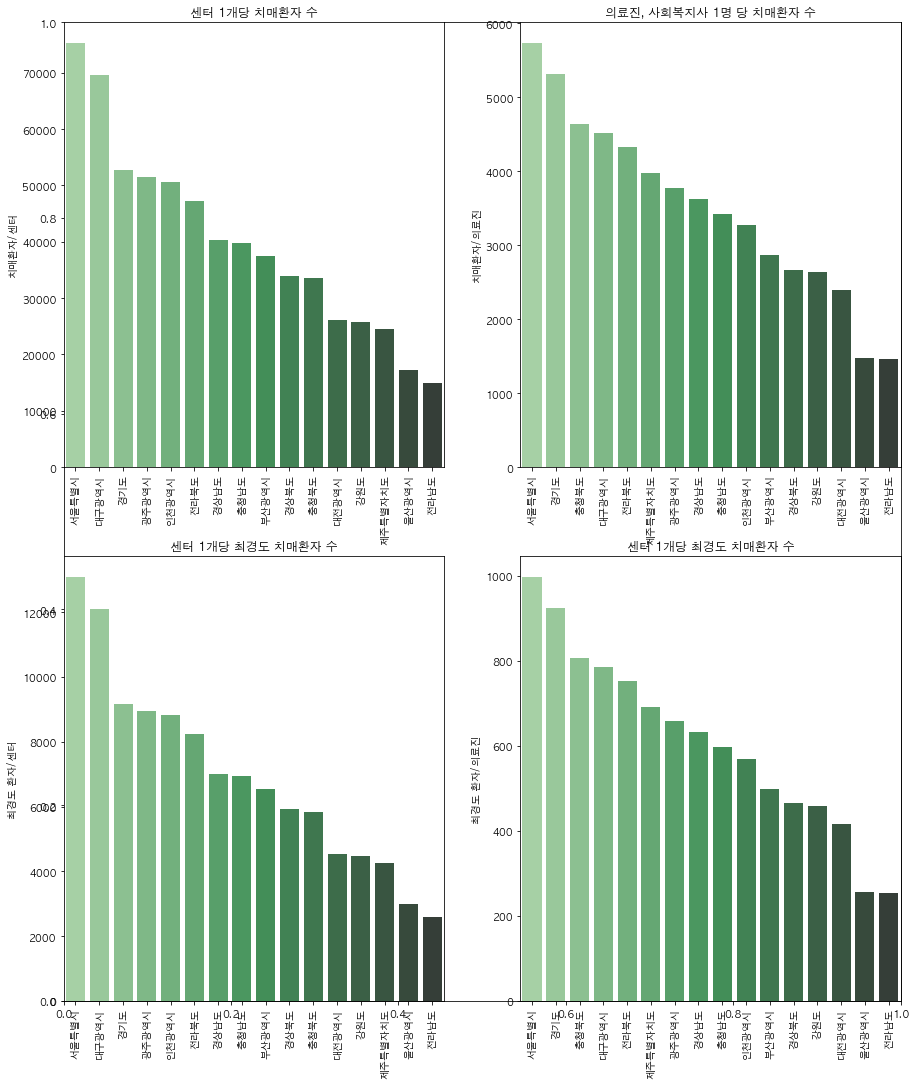

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 18))


plt.rcParams['axes.unicode_minus'] = False
# warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'AppleGothic'
 


df =df.sort_values('치매환자/센터', ascending=False)

plt_1 = fig.add_subplot(2,2,1)
plt_1 = sns.barplot(x=df.index, y=df['치매환자/센터'], palette='Greens_d' )

plt.xticks(rotation=90)
plt_1.set_title('센터 1개당 치매환자 수')

df =df.sort_values('치매환자/의료진', ascending=False)

plt_2 = fig.add_subplot(2,2,2)
plt_2 = sns.barplot(x=df.index, y=df['치매환자/의료진'], palette='Greens_d' )
plt.xticks(rotation=90)
plt_2.set_title('의료진, 사회복지사 1명 당 치매환자 수')



df =df.sort_values('최경도 환자/센터', ascending=False)

plt_3 = fig.add_subplot(2,2,3)
plt_3 = sns.barplot(x=df.index, y=df['최경도 환자/센터'], palette='Greens_d' )

plt.xticks(rotation=90)
plt_3.set_title('센터 1개당 최경도 치매환자 수')



df =df.sort_values('최경도 환자/의료진', ascending=False)

plt_3 = fig.add_subplot(2,2, 4)
plt_3 = sns.barplot(x=df.index, y=df['최경도 환자/의료진'], palette='Greens_d' )

plt.xticks(rotation=90)
plt_3.set_title('센터 1개당 최경도 치매환자 수')

plt.savefig('그래프1.png', dpi=400)


In [132]:
최경도 환자 대비 / 상관 분석 - 환자수, 센터수, 의료진 수 

SyntaxError: invalid syntax (1410735144.py, line 1)

In [153]:
16/6

2.6666666666666665

In [155]:
df.columns

Index(['센터 수', '치매환자 수', '치매환자/센터', '의료진&사회복지사 수', '치매환자/의료진', '최경도환자 수',
       '최경도 환자/센터', '최경도 환자/의료진'],
      dtype='object')

In [156]:
df_sim = df[['치매환자 수', '최경도환자 수', '센터 수', '의료진&사회복지사 수']]

In [157]:
df_sim.corr()

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
치매환자 수,1.000000,1.000000,0.779167,0.798529
최경도환자 수,1.000000,1.000000,0.779167,0.798529
센터 수,0.779167,0.779167,1.000000,0.970854
의료진&사회복지사 수,0.798529,0.798529,0.970854,1.000000


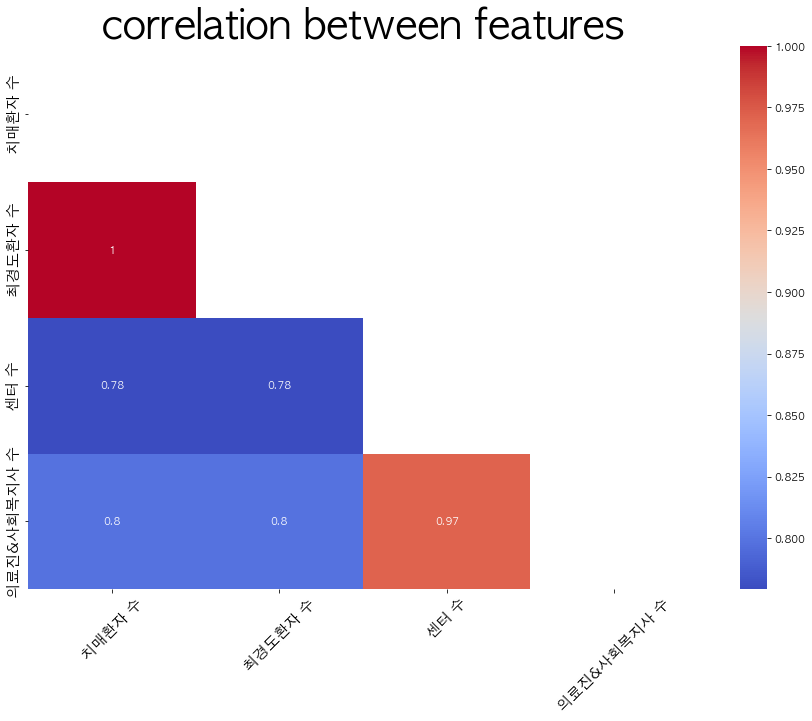

<Figure size 432x288 with 0 Axes>

In [194]:
import numpy as np 

#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = df_sim.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()



plt.savefig('그래프2.png', dpi=400)

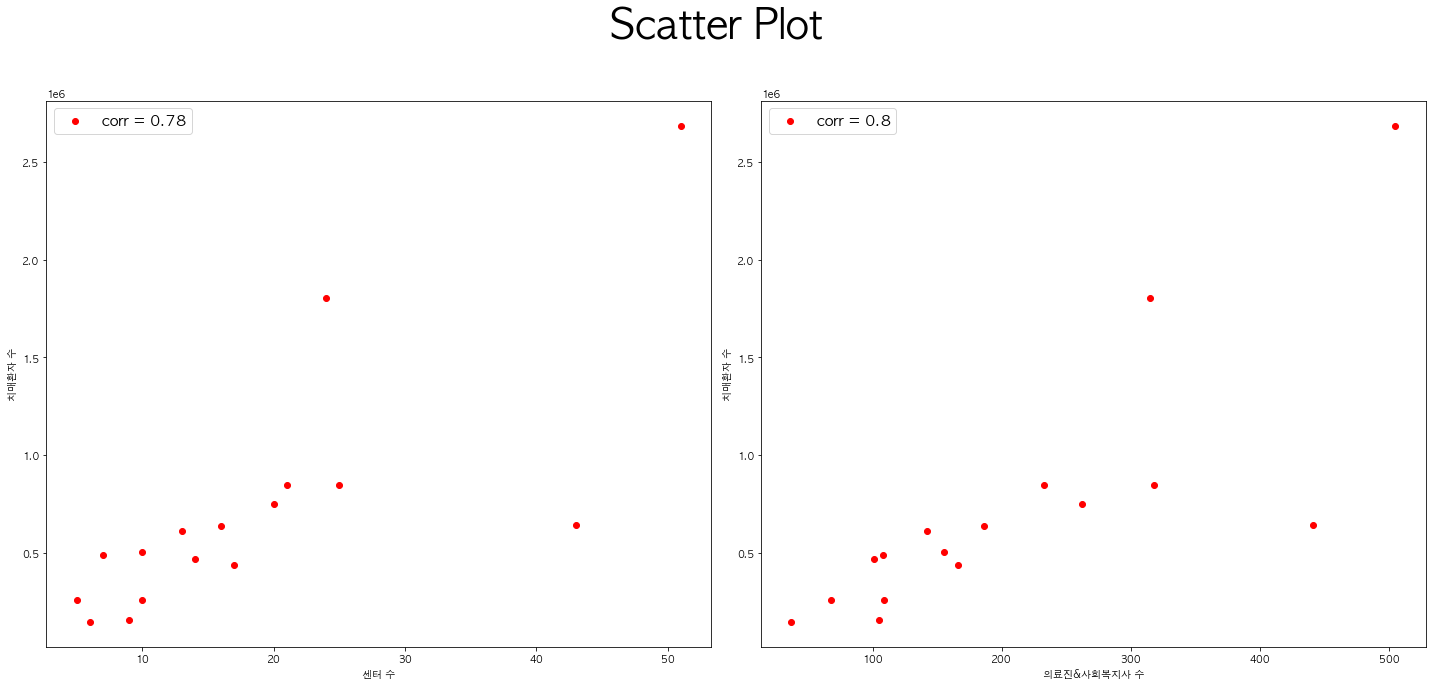

<Figure size 432x288 with 0 Axes>

In [195]:
target = "치매환자 수"
feature = ['센터 수', '의료진&사회복지사 수']

plt.figure(figsize=(20,10))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature)):
    plt.subplot(1, 2,i+1) # 세로, 가로 
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = df_sim[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(df_sim[feature[i]], df_sim[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.savefig('그래프3.png', dpi=400)

In [184]:
df_sim.head()

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
서울특별시,1804559.66,313993.35,24,315
경기도,2685312.12,467244.42,51,505
충청북도,468731.50,81559.36,14,101
대구광역시,487339.35,84796.99,7,108
전라북도,614586.70,106938.10,13,142


환자 수는 적은데 센터 수는 많은 지역 

In [188]:
df_sim[(df_sim['센터 수']> 40) & (df_sim['치매환자 수']< 1e6)]

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
전라남도,642153.77,111734.83,43,441


환자 수는 많은데 다른 곳에 비해 센터 수가 적은 지역 

In [190]:
df_sim[(df_sim['센터 수']< 30) & (df_sim['치매환자 수']> 1.5e6)]

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
서울특별시,1804559.66,313993.35,24,315


환자 수도 많고 센터 수도 많은 지역

In [191]:
df_sim[(df_sim['센터 수']> 45) & (df_sim['치매환자 수']> 2e6)]

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
경기도,2685312.12,467244.42,51,505


환자 수는 많은데 다른 곳에 비해 의료진&사회복지사 수가 적은 지역 

In [192]:
df_sim[(df_sim['의료진&사회복지사 수']< 400) & (df_sim['치매환자 수']> 1.5e6)]

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
서울특별시,1804559.66,313993.35,24,315


In [196]:
df_sim[(df_sim['의료진&사회복지사 수']> 400) & (df_sim['치매환자 수']< 1.0e6)]

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
전라남도,642153.77,111734.83,43,441


In [197]:
df_sim[(df_sim['의료진&사회복지사 수']> 400) & (df_sim['치매환자 수']> 2.0e6)]

,치매환자 수,최경도환자 수,센터 수,의료진&사회복지사 수
경기도,2685312.12,467244.42,51,505
